what is a contrast map? (or image) after we have estimated our model (found the $\beta$s that best fit our input data to response signal) for _each_ voxel.  remembering that $\beta$ is a vector and  ***we are only interested in relative values (absolute values are meaningless)***. So we make a contrast map by subtracting one $\beta^i$ from another $\beta^j$.  We find those voxels that for which the $\beta_v^i - \beta_v^j$ is statistically significant relevant to the RSS - residual squared sum of errors and after error correction for multiple comparisons, or possibly clustering.

------------



what is the difference between a T-contrast and a F-contrast? [mit mindhive response here](http://mindhive.mit.edu/node/60). My synopsis: a t-statistic is the parameter estimate of a nearly gaussian distributed variable divided by its standard error. Remembering that a linear combination of Gaussian variables is also a Gaussian variable, and that contrast maps are just that. So a T-contrast is a t-statistic of a contrast map.

-----------

----------
An F-stastistic is an _OR_ of conditions such as $(A > B) \cup (A > C) \cup (B > C)$. While general enough to account for multiple comparaisons it does not tell us which of these conditions is significant, only that at least one of them is.

-----------
reading [nilearn plot decoding tutorial](http://localhost:8888/notebooks/jnotebooks/plot_decoding_tutorial%20(1).ipynb). It would seem that a `mask` is not binary, rather it seems to be a gaussian variable. Mask probably refers to a t-statistic of a voxel over time. but why would these be normalized over time, and 

_______________
Functions accept either 3D or 4D images, and we need to use on the one hand `nilearn.image.index_img` or `nilearn.image.iter_img` to break down 4D images into 3D images, and on the other hand `nilearn.image.concat_imgs` to group a list of 3D images into a 4D image.

## some goals!

- make a function that can make a "significant" signal. so it would have to be stimulus aware. Said function needs to take a parameter that would let us vary the noise to signal.
why don't we just make a signal and 10 kinds of noise, and dot them with some weighting vector. 
Except, we want the matrix to be brain aware. so it produces the right signal in the right place.

- how do we make the right signal happen at the right place? ah, there's the rub.. easy, we look at a billion studies and we grap their results. but here's the thing, the brain is, ideally, this GLM of signals. that when we stimulate it the correct way, it sends us a coded message by lighting up in different places. Whence the term: _decoding_. of course the message is ambiguous to us, so we compare its responses with other responses hoping to be able to figure what's going on. 

- back to locations and signals. location space is easy-ish 30 * 64 * 64 = 122880 voxels, but we can group them somehow. or have seeds that grow somehow. but here's the thing what is our "signal space" $SS$ and what is our "location space" $LS$. location space would be any subset of voxels or super-voxels. 
do we simply make up an arbitrary point in $LS$ and assign it a signal? -
other goodies might be time lag, recursive things (eg associations) eg. that may be a house to you buts its extreme wealth to me. (which is why we do contrast maps, right?). so in general, individual differences.

- we might want to use have options for different stim signals as well. that's the other thing, when using different stim signals, 


- we might want to make not only BOLD spatially dependent but also some kinds of noise

- so what 





In [56]:
%matplotlib inline
import math
import numpy as np


In [54]:
# let's make a signal
def signal( stim_a):
    pass

def gammaHRF(k,tau_h,t):
    return 1/(k*tau_h*math.factorial(k-1) * (t/tau_h)**k * np.exp(- t / tau_h))

In [92]:
def stim(totaltime, onsets, durations, accuracy=1):
    """
    Parameters:
    totaltime: total length in seconds of stimulus signal
    onsets: array of times when stimulus starts 
    durations: length of time stimulus occurs after each onset
    accuracy: time resolution
    """
    assert onsets[-1] + durations[-1] <= totaltime
    s = np.zeros(int(totaltime // accuracy)) # dtype?
    os = onsets / accuracy
    dur = durations / accuracy
    
    # if there is only one duration we assume it generalizes to all durations
    # todo: generalize to tuples 
    if len(durations) == 1:
        dur = dur * np.ones(len(onsets))
    assert len(durations) == len(onsets)
    offsets = os + dur
    for i in range(len(os)):
        start = int(os[i])
        stop = min(int(offsets[i]), totaltime // accuracy )
        s[ start : stop ] = 1
#     print(s)
    return s


[ 1.  1.  1.  1.  0.  0.  0.  0.  0.  0.  1.  1.  1.  1.  0.  0.  0.  0.
  0.  0.  1.  1.  1.  1.  0.  0.  0.  0.  0.  0.  1.  1.  1.  1.  0.  0.
  0.  0.  0.  0.  1.  1.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


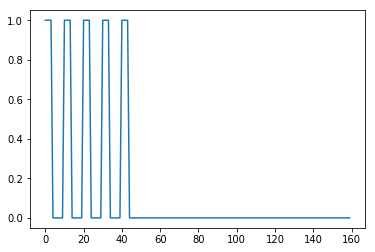

In [90]:
plt.plot( stim(80, np.arange(5)*5, np.ones(5)*2, 0.5))

[ 1.  1.  0.  0.  0.  1.  1.  0.  0.  0.  1.  1.  0.  0.  0.  1.  1.  0.
  0.  0.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.]


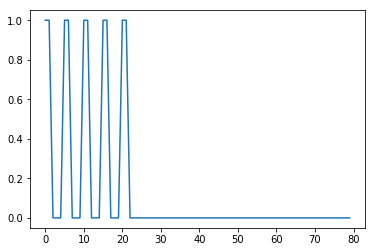

In [91]:
plt.plot( stim(80, np.arange(5)*5, np.ones(5)*2, 1))

In [76]:
(3 // 0.3)

10.0

/opt/conda/envs/neuro/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  
/opt/conda/envs/neuro/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in true_divide
  


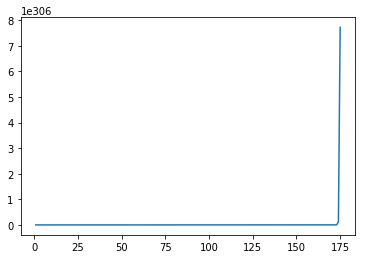

In [57]:
xs = np.linspace(0,200,200)
k = 3
fwhm = 1
tau_h = 0.242 * fwhm
plt.plot(gammaHRF(k,tau_h, xs))

In [58]:
xs

array([   0.        ,    1.00502513,    2.01005025,    3.01507538,
          4.0201005 ,    5.02512563,    6.03015075,    7.03517588,
          8.04020101,    9.04522613,   10.05025126,   11.05527638,
         12.06030151,   13.06532663,   14.07035176,   15.07537688,
         16.08040201,   17.08542714,   18.09045226,   19.09547739,
         20.10050251,   21.10552764,   22.11055276,   23.11557789,
         24.12060302,   25.12562814,   26.13065327,   27.13567839,
         28.14070352,   29.14572864,   30.15075377,   31.15577889,
         32.16080402,   33.16582915,   34.17085427,   35.1758794 ,
         36.18090452,   37.18592965,   38.19095477,   39.1959799 ,
         40.20100503,   41.20603015,   42.21105528,   43.2160804 ,
         44.22110553,   45.22613065,   46.23115578,   47.2361809 ,
         48.24120603,   49.24623116,   50.25125628,   51.25628141,
         52.26130653,   53.26633166,   54.27135678,   55.27638191,
         56.28140704,   57.28643216,   58.29145729,   59.29648

In [45]:
signal([1,0,0,1])

# make a testing-led suite

eg. make some tests, and then pass them. If you don't know what tests to write, that's probably the problem...

In [29]:
# already in docker image. cool.
import pytest

## Test1 - Communication interface

The self-identifying _unqualified_ participant in any research project faces the challenge of seeking information from the the _qualified_ participants while not becoming more of a burden than an assistant. A high-reward but high-risk strategy is to reduce communication to a minimum, and thus the burden, while attempting to solve problems autonomously. The strategy is freqently doomed as the new-comer often does not  have the theoretical background to completely understand the requests that are made of them. 


In [30]:
import nilearn
import niwidgets

In [31]:
from nilearn._utils.testing import generate_fake_fmri
im_1,mask_1 = generate_fake_fmri()

In [32]:
import matplotlib.pyplot as plt

In [33]:
data = im_1.get_data()

In [37]:
dir(mask_1)
mask_1.shape

(10, 11, 12)

In [38]:
im_1.shape

(10, 11, 12, 17)

> why is there a shape file with the fmri??

it's there to reduce computation time, and improve chances of getting a result: Bonferoni correction requires that you divide your signal by the the number of voxels - so you want to choose the right voxels to get the right contrasts...(i think)

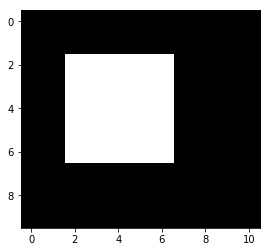

In [42]:
plt.imshow(mask_1.get_data()[:,:,5], cmap='Greys_r')
plt.show()

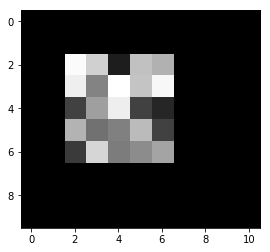

In [10]:
plt.imshow(data[:,:,5,0], cmap='Greys_r')
plt.show()

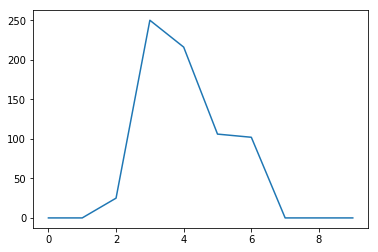

In [14]:
plt.plot(data[:,4,5,0])
plt.show()

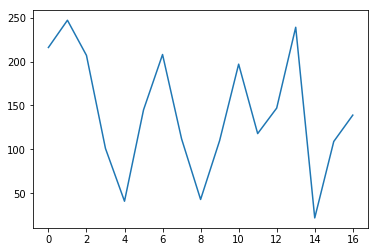

In [16]:
# voxel 4 4 5 over time
plt.plot(data[4,4,5,:])
plt.show()

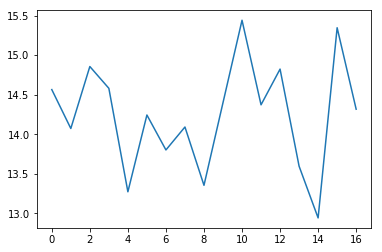

In [26]:
# total energy over time
plt.plot( data.mean(axis=(0,1,2)))
plt.show()


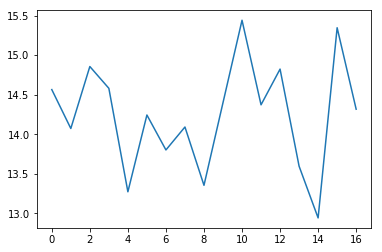

In [26]:
# total energy over time
plt.plot( data.mean(axis=(0,1,2)))
plt.show()


In [20]:
voxel

[4, 4, 5, 3]